# 트랜스포머로 만드는 대화형 챗봇
## 개요
트랜스포머 모델의 인코더-디코더 구조를 이해하고, 영어로 된 대화형 챗봇을 만들어봅니다.

## 목차
1. 챗봇의 개념 및 딥러닝과의 관계
2. 트랜스포머와 인코더 디코더
3. 트랜스포머의 입력 이해하기
4. 어텐션
5. 스케일드 닷 프로덕트 어텐션
6. 머리가 여러 개인 어텐션
7. 마스킹
8. 인코더
9. 디코더
10. 챗봇의 병렬 데이터 받아오기
11. 병렬 데이터 전처리하기
12. 모델 정의 및 학습하기
13. 챗봇 테스트하기

## 회고
---

# 1. 챗봇의 개념 및 딥러닝과의 관계
## 대화형 챗봇이란?
[챗봇의 5가지 대표 유형](https://tonyaround.com/%ec%b1%97%eb%b4%87-%ea%b8%b0%ed%9a%8d-%eb%8b%a8%ea%b3%84-%ec%b1%97%eb%b4%87%ec%9d%98-5%ea%b0%80%ec%a7%80-%eb%8c%80%ed%91%9c-%ec%9c%a0%ed%98%95-%ec%a2%85%eb%a5%98/)
- 대화형 챗봇 : 질문을 분석하여 답변을 주는 프로세스.  인공지능 기반으로 되어 있으며, 머신러닝 및 딥러닝을 기본으로 합니다. 어떤 문장으로 질문을 하면 답변을 전달합니다.
- 트리형(버튼) 챗봇 : 정해진 트리구조를 따라 답변을 얻는 형태. 최종 답변을 위한 경우의 수는 정해져 있습니다. 일반적으로 자주하는 질문의 서비스에 사용되는 유형
- 추천형 챗봇 : 표면적으로는 대화의 형태를 띄고 있지만, 답변을 제공하는 방식이 대화형 챗봇과 다릅니다. 인공지능 기반일 수도 아닐 수도 있음. 질문을 던지면 대화 형태의 답변을 제공하는 것이 아니라 사전에 정의된 답변의 리스트를 알고리즘 결과의 우선순위별로 보여줍니다. 아니면 단순하게 검색 결과의 리스트 형태로 보여줄 수도 있습니다.
- 시나리오형 챗봇 : 원하는 서비스 혹은 아웃풋 제공을 위하여 정해진 시나리오를 수행해주는 챗봇입니다. 최종 결과 전달을 위해서 고객에게 받아야하는 정보를 순서에 따라 받아줍니다. 로그인이라고 하면 아이디를 묻고 데이터를 받고 유효성 체크를 하고 비밀번호를 묻고 데이터를 받고 유효성 체크를 합니다. 단계가 있기 때문에 고객 이탈율 분석을 통해서 고객 경험을 단계별로 향상시킬 수 있습니다.
- 결합형 챗봇 : 비즈니스 목적에 따라 위의 챗봇 유형들을 결합해서 설계가 가능.   
    
|챗봇 유형|비용|전문성|시간|
|:-------:|:---:|:----:|:---:|
|대화형|매우 높음|매우 높음|매우 높음|
|트리형|매우 낮음|낮음|보통|
|추천형|보통|보통|많음|
|시나리오형|보통|보통|보통|  

대화형을 제외하면 사실상 챗봇은 대화형 UX를 가졌지만 본질적으로는 검색엔진이거나, 혹은 음성 ARS를 대화형 UX에 옮겨놓은 것이라 할 수 있습니다.  

## 챗봇과 딥러닝
- 챗봇에 대한 초창기의 기대, 한계점, 최근 BERT 등의 pretrained model의 발전 이후의 새로운 기대감으로 이어지는 챗봇의 간략한 역사를 확인해보기
- 트랜스포머 모델의 활용 : 인간보다 정확하게 퀴즈를 풀어내는 BERT, ALBERT 등은 모두 트랜스포머(Transformer)라는 모델을 활용하여 pretrain을 적용한 것들입니다.
- 트랜스포머 이전 : 트랜스포머 이전에도 LSTM 등 RNN 기반의 딥러닝 모델, 그리고 이를 인코더-디코더 구조로 엮은 seq2seq 모델 등을 활용하여 챗봇 제작을 시도해 왔습니다. 
- 트랜스포머의 장점, 메인 스트림이 된 이유
    - 병렬처리에 불리한 LSTM에 비해 훨씬 뛰어난 처리 속도를 보이면서도 
    - LSTM 등 RNN 모델이 가지는 장기 의존성에 강건한 특징 때문에 매우 긴 길이의 문장을 처리하는 데 유리하다는 좋은 특징을 보여주었고, 
    - 이후 자연어처리 분야의 혁신을 가져온 발판이 되어 주었습니다.
- 인코더-디코더 구조 모델의 예시 : seq2seq, AutoEncoder, GAN 등
- seq2seq 모델을 기반으로 하는 번역기 예시 : 영어를 한국어로 번역하는 모델은 영어 문장을 인코더로 해석하여 나온 벡터를 디코더의 인풋(input)으로 삼아 디코더에서 한국어 문장을 생성하게 합니다. 그런 것처럼 사용자의 입력 문장을 인코더로 해석하고, 적절한 답변 문장을 디코더가 생성하도록 구성할 수 있을 것입니다.
- 더욱 좋은 성능을 내기 위해서 필요한 것? : 엄청나게 많은 코퍼스로 학습시킨 pretrained model을 활용하는 것

# 2. 트랜스포머와 인코더 디코더

## 인코더와 디코더 구조 되짚어보기
번역기를 만드는 데 사용한 대표적인 모델인 인코더와 디코더 구조를 되짚어 봅시다.    
![incoder-decoder](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_UcFQAjh.max-800x600.png)    
- 번역기는 인코더와 디코더 두 가지 아키텍처로 구성
- 인코더에 입력 문장이 들어가고, 
- 디코더는 이에 상응하는 출력 문장을 생성합니다. 
- 이를 훈련한다는 것은 결국 입력 문장과 출력 문장 두 가지 병렬 구조로 구성된 데이터셋을 훈련한다는 의미였습니다.  

#### 훈련 데이터셋의 구성(번역)
    - 입력 문장 : '저는 학생입니다.'
    - 출력 문장 : 'I am a student'    

이런 병렬적으로 구성된 데이터셋을 인코더와 디코더로 학습하는 경우는 사실 번역기에만 한정되지는 않습니다.   
질문에 대해서 대답을 하도록 구성된 데이터셋을 인코더와 디코더 구조로 학습한다면, 주어진 질문에 답변할 수 있는 챗봇 또한 만들 수 있을 테니까요.  

#### 훈련 데이터셋의 구성(질문-답변)
    - 입력 문장 : '오늘의 날씨는 어때?'
    - 출력 문장 : '오늘은 매우 화창한 날씨야'
    
## 트랜스포머의 인코더와 디코더
트랜스포머 또한 번역기와 마찬가지로 기본적으로 인코더와 디코더 구성을 가지고 있습니다. 입력 문장을 넣으면 출력 문장을 내뱉고 있지요.  
![transformer](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_1_kxflIxg.max-800x600.png)  
[출처 : http://jalammar.github.io/illustrated-transformer/]  

위의 블랙박스로 가려져 있는 트랜스포머의 내부 구조를 열어보면 아래와 같습니다!  
![transformer_blackbox](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_2_EnQyi4S.max-800x600.png)  
[출처 : http://jalammar.github.io/illustrated-transformer/]  

초록색 색깔의 도형을 인코더 층(Encoder layer), 핑크색 색깔의 도형을 디코더(Decoder layer)라고 하였을 때, 
- 입력 문장은 누적해 쌓아 올린 인코더의 층을 통해서 정보를 뽑아내고, 
- 디코더는 누적해 쌓아 올린 디코더의 층을 통해서 출력 문장의 단어를 하나씩 만들어가는 구조를 갖고 있어요.  


그리고 그 내부를 조금 더 확대해 보면 아래와 같이 톱니바퀴처럼 맞물려 돌아가는 여러 가지 부품들로 구성돼 있습니다.  
![incoder-decoder 내부](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_3_ddZedfW.max-800x600.png)  
[출처 : http://jalammar.github.io/illustrated-transformer/]  

위의 그림에서 적힌 모듈들을 하나씩 정리해 볼까요?  
Q. 트랜스포머에서 인코더와 디코더는 어떤 역할을 수행하나요?  
A. 인코더는 입력 문장을 임베딩하고 문장의 의미를 파악하여 디코더에 전달합니다. 디코더는 인코더에서 전달 받은 정보를 기반으로 문장을 생성합니다.  

**embedding과 incoding**  
- Embedding: 토크나이징된 단어 토큰들을 벡터들로 변환하는 과정
- Encoding: Embedding된 벡터들을 Sentence Matrix로 변환하는 과정 (주로 Bi-LSTM 이용)
- 보통 Encoder에서 Embedding과 Encoding을 모두 수행한다.  
[참조 블로그](https://beausty23.tistory.com/223)

# 3. 트랜스포머의 입력 이해하기
필요한 패키지를 임포트하기

In [1]:
# 패키지 임포트
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


### 모델의 입력 데이터 처리 - 일반 모델과 트랜스퍼 모델의 차이점

![인코더디코더](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_4_fuzN6PD.png)  

- 많은 자연어 처리 모델들은 텍스트 문장을 입력으로 받기 위해 단어를 임베딩 벡터로 변환하는 벡터화 과정을 거칩니다. 
- 트랜스포머 또한 벡터화 과정을 거칩니다.
- 모델의 입력 데이터 처리에는 트랜스포머 모델이 다른 점 (RNN 계열의 모델들과 다른 점)
    - 바로 임베딩 벡터에 어떤 값을 더해준 뒤에 입력으로 사용한다는 점입니다. 
    - 그 값은 바로 위 그림에서의 포지셔널 인코딩(positional Encoding)에 해당하는 부분입니다.  
    

위 그림에서 인코더의 입력 부분을 조금 더 확대해 본다면 이런 그림이 나오겠죠?  
![인코더 입력 부분](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_5_kH52kQN.png)  

### 포지셔널 인코딩을 하는 이유는?
- 트랜스포머는 입력을 받을 때, 문장에 있는 단어들을 1개씩 순차적으로 받는 것이 아니라, 문장에 있는 모든 단어를 한꺼번에 입력으로 받기 때문
    -> 이 부분이 트랜스포머가 RNN과 결정적으로 다른 점!!!
- RNN : RNN에는 어차피 문장을 구성하는 단어들이 어순대로 모델에 입력되므로, 모델에게 따로 어순 정보를 알려줄 필요가 없었습니다.
- Transformer 
    - 단어와 그 단어의 어순 정보(문장의 몇 번째 어순으로 입력되었는지)를 함께 입력으로 삼는다! (같은 단어라고 하더라도)
    - 단어의 임베딩 벡터(단어) + 위치 정보를 가진 벡터(Positional Encoding) 값 = 모델의 입력
    - 문장에 있는 모든 단어를 한꺼번에 문장 단위로 입력받는 트랜스포머는 자칫 'I ate lunch'와 'lunch ate I'를 구분할 수 없을지도 모르기 때문  

![수식](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_6_DyxB6Ax.png)   
포지셔널 인코딩의 벡터값은 위의 수식에 의해서 정해집니다.    
사인 함수와 코사인 함수의 그래프를 상기해보면 요동치는 값의 형태를 생각해 볼 수 있는데, **트랜스포머는 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해줌으로써 단어의 순서 정보를 더하여 줍니다.**  

위의 두 함수에는 pos,i,d model 등 생소한 변수들이 있습니다.   
위의 함수를 이해하기 위해서는 위에서 본 임베딩 벡터와 포지셔널 인코딩의 덧셈은   
= 임베딩 벡터가 모여 만들어진 문장 벡터 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어진다는 점을 이해해야 합니다.

![덧셈 연산](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_7_3Rneu0P.png)  
- d model 은 임베딩 벡터의 차원을 의미하고 있고, 
- pos는 입력 문장에서의 임베딩 벡터의 위치를 나타내며, 
- i는 임베딩 벡터 내의 차원의 인덱스를 의미합니다.   
이렇게 임베딩 행렬과 포지셔널 행렬이라는 두 행렬을 더함으로써 각 단어 벡터에 위치 정보를 더해주게 되는 것이죠!  

Q. 한 문장에 같은 단어 A가 여러 번 등장하였다고 가정해보겠습니다. 임베딩 문장 행렬에 포지셔널 인코딩을 해주었을 때와 해주지 않았을 때, 트랜스포머가 임베딩 문장 행렬 내의 다수의 A 단어 벡터로부터 얻을 수 있는 정보의 차이는 어떤 것이 있을까요?  
A. 같은 단어라고 하더라도 포지셔널 인코딩을 해준 경우에는 임베딩 벡터값이 달라지므로, 같은 단어라고 해도 각각 다른 위치에 등장했다는 사실을 모델에 알려줄 수 있습니다.  

## 포지셔널 행렬 구현하기

In [2]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    # PositionalEncoding 메서드 : 포지셔널 인코딩을 위한 각도 배열을 생성
    super(PositionalEncoding, self).__init__()
    # positional_encoding 메서드를 호출하여 pos_encoding 변수에 저장
    self.pos_encoding = self.positional_encoding(position, d_model)

    # get_anfles 메서드 : 각도 배열을 생성하기 위해 사용. 주어진 위치(position), 인덱스(i), 및 임베딩 차원(d_model)에 대한 각도를 계산.
  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

    # positional_encoding : 각도 배열을 생성하고, 짝수 인덱스에는 사인 함수를, 홀수 인덱스에는 코사인 함수를 적용한 후, sin과 cosine이 교차되도록 재배열 
  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

    # 입력에 포지셔널 인코딩 값을 더하여 반환. 포지셔널 인코딩의 길이를 입력의 길이에 맞게 자릅니다.
  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


행의 크기가 50, 열의 크기가 512인 행렬을 그려봅시다.   
이를테면, 최대 문장의 길이가 50이고 워드 임베딩 차원을 512로 하는 모델의 입력 벡터 모양이 이와 같을 것입니다.  

Q.위의 문장처럼 행의 크기가 50, 열의 크기가 512인 행렬을 만드는 코드를 완성하여 입력 벡터 모양을 시각화하세요.  
(추가 : 아래 퀴즈를 풀면서 작성한 코드를 변경해보세요.)

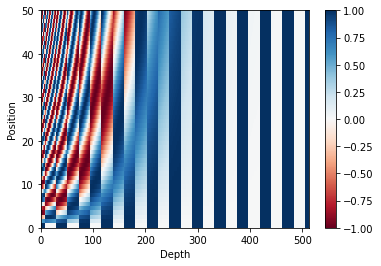

In [3]:
# 행의 크기가 50, 열의 크기가 512인 행렬 생성
position = 50
d_model = 512
sample_pos_encoding = PositionalEncoding(position, d_model)

# 시각화
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

Q. 임베딩 벡터의 차원이 256이고 최대 문장의 길이가 30인 텍스트를 입력으로 하는 트랜스포머를 구현한다고 하였을 때, 적절한 포지셔널 인코딩 행렬의 크기를 추측해보고 위에 구현한 포지셔널 인코딩 레이어를 사용해 표현해 보세요.  
A. 위의 코드에서 50, 512 대신 30, 256을 입력으로 하여 행렬을 만들면 정답입니다. 즉 PositionalEncoding(30,256)로 표현할 수 있습니다.  

### 포지셔널 인코딩 - 실제 논문에서 제시된 그림으로 보기
![포지셔널 인코딩](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_9_l58gVWT.max-800x600.png)  

# 4. 어텐션
트랜스포머의 인코더와 디코더에서 사용하고 있는 개념인 어텐션에 대해서 알아보겠습니다!

## 어텐션이란?
어텐션 메커니즘을 그림으로 표현한다면 아래와 같이 표현할 수 있습니다.  
![어텐션](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_10_AaCfqrY.png)  

### 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다.
- 구해낸 이 유사도를 키(Key)와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다. 
- 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value) 라고 합니다.  

## 트랜스포머에서 사용된 어텐션
트랜스포머는 총 세 가지의 어텐션을 사용합니다.  
![3가지 어텐션](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_11_tFFhFjx.png)  

- 첫 번째 그림인 인코더 셀프 어텐션은 인코더에서 이루어지고,
- 두 번째 그림인 디코더 셀프 어텐션은 디코더에서 이루어지며,
- 세 번째 그림인 인코더-디코더 어텐션 또한 디코더에서 이루어집니다.  

![각 어텐션의 위치](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_12_SIe2V15.png)  
위 그림은 트랜스포머의 전체적인 아키텍처에서 각 어텐션이 위치한 곳을 보여줍니다.  
- 트랜스포머의 어텐션 함수에 사용되는 **쿼리(Query), 키(Key), 밸류(Value) 는 기본적으로 '단어 (정보를 함축한) 벡터'** 입니다.
- 단, 여기서 **'단어 벡터' 란 초기 입력으로 사용되었던 임베딩 벡터가 아니고, 트랜스포머의 여러 연산을 거친 후의 단어 벡터** 입니다.

### 세 가지 어텐션이 하는 일
- 인코더 셀프 어텐션 : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구한다.
- 디코더 셀프 어텐션 : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구한다.
- 인코더-디코더 어텐션 : 디코더가 잘! 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구한다.    
    
무려 세 가지 어텐션 중 두 가지가 셀프 어텐션인데요.
그럼 대체 셀프 어텐션이 어떤 의미를 가지고 있으며 트랜스포머에서 왜 중요한지 이해해 볼까요?
    
    
## 셀프 어텐션(Self Attention)
### 셀프 어텐션이란? 유사도를 구하는 대상이 다른 문장의 단어가 아니라 현재 문장 내의 단어들이 서로 유사도를 구하는 경우
가령, 위에서 언급한 인코더-디코더 어텐션은 서로 다른 단어 목록(인코더 내 단어와 디코더 내 단어) 사이에서 유사도를 구하기에 셀프 어텐션이 아닙니다.  
![셀프어텐션](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_13_hjMyZwL.png)  
https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html  

위의 그림은 [구글 AI 블로그 포스트](https://blog.research.google/2017/08/transformer-novel-neural-network.html)에서 가져왔습니다.   
위의 예시 문장을 번역하면 '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.' 라는 의미가 됩니다.   
그런데 여기서 그것(it) 에 해당하는 것은 과연 길(street) 일까요? 동물(animal) 일까요?  

우리는 동물이라는 것을 쉽게 알 수 있지만, 기계는 그렇지 않습니다.   
하지만 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하여 그것(it) 이 동물(animal) 과 연관되었을 확률이 높다는 것을 찾아냅니다.   
그런데 한 가지 의문이 듭니다. 유사도는 어떻게 구할까요?

Q. 트랜스포머에서 사용되는 어텐션 중 셀프 어텐션을 사용하지 않는 것은 무엇인가요? 그리고 다른 어텐션과 차이점은 무엇인가요?  
인코더-디코더 어텐션은 인코더에 입력된 단어들과 디코더에서 생성된 문장의 단어들과의 유사도를 구합니다.   
앞에서 나온 번역의 예시인 입력 문장 ‘저는 학생입니다.’와 출력 문장 ‘I am a student’에서 ‘학생’ 단어가 ‘I’, ‘am’, ‘a’, ‘student’ 중 어떤 단어와 유사한지를 계산하는 것 입니다.

## 5. 스케일드 닷 프로덕트 어텐션
어텐션은 단어들 간의 유사도를 구하는 메커니즘!  
- 트랜스포머에서 어텐션 값을 구하는 방법(수식)
![attention수식](https://miro.medium.com/max/1400/1*R9Fr5BNs0FroB1b6TStLKQ.webp)  
Q, K, V는 각각 쿼리(Query), 키(Key), 값(Value)를 나타냅니다.  

앞서 언급했던 어텐션 함수의 정의와 결과값을 다시 상기해봅시다.  
어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다.  
그리고 구해낸 이 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다.   
그리고 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value) 라고 합니다.

위 정의와 아래 내용 세 가지만 기억하면 수식을 그림으로 정리할 수 있습니다.  
1. Q, K, V는 단어 벡터를 행으로 하는 문장 행렬이다.   
    각 단어는 행렬의 한 행에 해당하고(단어 벡터), 여러 단어 벡터들을 조합하여 문장을 나타내는 행렬을 만든다.(문장 행렬)
2. 벡터의 내적(dot product) 은 벡터의 유사도를 의미한다.
3. 특정 값을 분모로 사용하는 것은 값의 크기를 조절하는 스케일링(Scaling)을 위함이다.  

### Q와 K의 전치 행렬을 곱하는 것 - 그림으로 표현
![전치 행렬 곱](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_15_pUfIgKn.png)  
문장 행렬 Q와 문장 행렬 K를 곱하면 위의 그림과 같은 초록색 행렬을 얻을 수 있습니다.  

#### 초록색 행렬이 의미하는 값은? 각 단어 벡터의 유사도가 모두 기록된 유사도 행렬이다!
예를 들어 'am' 행과 'student' 열의 값은 Q 행렬에 있던 'am' 벡터와 K 행렬에 있던 'student 벡터'의 내적값을 의미합니다.

#### Attintion 값 구하는 방법(과정)
- Q와 K의 유사도 구하는 과정
    - 위의 유사도 값을 스케일링 해주기 위해서 행렬 전체를 특정 값으로 나눠주고, 
    - 유사도를 0과 1사이의 값으로 Normalize해주기 위해서 소프트맥스 함수를 사용합니다.  
- 여기에 문장 행렬 V와 곱하면 어텐션 값(Attention Value) 를 얻습니다.  
![어텐션 값 구하기](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_16_neA52rZ.png)  

### 스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention)
![attention수식](https://miro.medium.com/max/1400/1*R9Fr5BNs0FroB1b6TStLKQ.webp)    

- 이 수식은 내적(dot product)을 통해 단어 벡터 간 유사도를 구한 후에, 특정 값을 분모로 나눠주는 방식으로 Q와 K의 유사도를 구하였다고 하여 **스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention)** 이라고 합니다. 
- 유사도를 구하는 방법이 스케일드 닷 프로덕트(scaled dot product)였기 때문에 이런 이름이 붙은 것!
- 만약에 분모에 특정 값을 나눠주는 부분을 사용하지 않았다면 어텐션의 이름은? **닷 프로덕트 어텐션(dot product attention)**  

**Q. 특정 값을 분모로 사용하여 스케일링(Scaling)을 하는 이유는?**   
A. 스케일링을 하지 않으면 벡터의 내적(dot product) 연산의 결과가 입력 벡터의 차원 수에 따라 크기가 매우 커지게 되고, softmax의 출력값이 작아지는 것을 방지하기 위해서 입니다. softmax의 출력값이 작아지면 역전파 과정에서 기울기 소실 문제가 발생할 수 있습니다.

## 구현하기
스케일드 닷 프로덕트 어텐션 함수를 구현해봅니다.  
- np.matmul()은 매트릭스, 행렬 곱을 수행하는 메소드

In [5]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # matmul_qk: Query(Q)와 Key(K) 간의 닷 프로덕트를 계산. 이는 어텐션 가중치를 구하기 위한 중간 단계. 어텐션 가중치는 Q와 K의 닷 프로덕트.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
    # logits : 닷 프로덕트를 행렬의 깊이(depth)로 나누어 스케일링을 수행
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가 : mask가 주어졌다면, 어텐션 가중치에 패딩에 대한 마스크를 적용
    # 패딩은 어텐션 계산 시 무시되어야 하므로, 해당 위치의 어텐션 가중치를 크게 음의 무한대로 만듭니다.
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용 : Softmax 함수를 사용하여 어텐션 가중치를 계산. 이는 어텐션 가중치를 확률 분포로 만듭니다.
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V(Value)의 닷 프로덕트 -> 이를 통해 쿼리에 대한 어텐션 값을 계산
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

슝=3


> 코드에서 어텐션 가중치란? [블로그 참조 - 어텐션 분포 구하기 부분](https://moondol-ai.tistory.com/316)  

이 글에서 앞으로 어텐션을 수행한다고 한다면, 스케일드 닷 프로덕트 어텐션을 의미합니다!

# 6. 머리가 여러 개인 어텐션
![히드라](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_17_l94shVz.png)  
그리스 로마 신화에 등장하는 히드라라는 괴물을 아시나요? 머리가 여러 개인 이 괴물은 여러 곳으로 동시에 시선을 둘 수 있었기 때문에 시선의 사각지대가 없어서 처치하기 어려운 괴물입니다. 결국 헤라클레스라는 영웅이 히드라의 머리를 하나씩 제거한 뒤에야 무찌를 수 있었는데요.

뜬금없이 갑자기 왜 히드라 얘기냐구요? 다른 비유를 하나 들어볼게요. 굉장히 어려운 문제가 가득한 시험지를 받았을 때 '혼자가 아니라 옆에서 누군가 같이 풀어준다면 좀 더 좋은 성적을 받을 텐데'하고 누구나 한 번쯤 상상해보았을 겁니다.

이런 이야기는 현실에서는 상상에 불과하지만, 기계가 할 수 있도록 해줄 수는 있습니다.

## 병렬로 어텐션 수행하기
트랜스포머에서 **num_heads라는 변수**는 기계가 몇 개의 똑똑한 머리를 사용할지, 다시 말해 **병렬적으로 몇 개의 어텐션 연산을 수행할지를 결정하는 하이퍼파라미터**입니다.
![num_heads](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_18_nnOTx9p.png)  

앞서 포지셔널 인코딩에서 d_model은 임베딩 벡터의 차원이라고 언급한 바 있습니다.   
결국 트랜스포머의 초기 입력인 문장 행렬의 크기는 문장의 길이를 행으로, d_model을 열의 크기로 가집니다.  

트랜스포머는 이렇게   
- 입력된 문장 행렬을 num_heads의 수만큼 쪼개서 어텐션을 수행하고, 
- 이렇게 얻은 num_heads의 개수만큼의 어텐션 값 행렬을 다시 하나로 concatenate합니다.  

위의 그림은 num_heads가 8개인 경우인데, 다시 concatenate하면서 열의 크기가 d_model이 됩니다.  
각자 문제지를 나눠서 푼 후에 마지막에 다시 결과를 합친다고 비유해볼 수도 있겠네요!  

Q. 논문에서 d_model은 512의 값을 가졌다고 하고, num_heads는 8의 값을 가졌다고 해요. 그렇다면, 연결하기 전 8개의 어텐션 값(Attention Value) 행렬의 열의 크기는 몇 차원이었을까요?  
A. 512/8 = 64  

## 멀티-헤드 어텐션
### 멀티 헤드 어텐션이란? 어텐션을 병렬로 수행하는 것!
이렇게 병렬로 어텐션을 수행하면 얻을 수 있는 효과는 무엇일까요?  
![병렬 어텐션](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_19_FwmaA3q.png)   
[출처 : http://jalammar.github.io/illustrated-transformer/]  

위 그림은 num_heads의 값이 8일 때, **병렬로 수행되는 어텐션이 서로 다른 셀프 어텐션 결과를 얻을 수 있음**을 보여줍니다.   
- 다시 말해 8개의 머리는 각각 다른 관점에서 어텐션을 수행하므로 한 번의 어텐션만 수행했다면 놓칠 수도 있던 정보를 캐치할 수 있습니다. 
- 예를 들어 위 그림에서라면 it_이라는 토큰이 animal_과 유사하다고 보는 관점과 street_과 유사하다고 보는 관점이 한꺼번에 모두 표현 가능하다는 뜻입니다.  

### 구현하기
멀티 헤드 어텐션을 구현하면 다음과 같습니다.  
내부적으로는 스케일드 닷 프로덕트 어텐션 함수를 호출합니다.  

Q. 주석을 참고해서 나머지 코드를 완성하세요.  

In [55]:
# 멀티 헤드 어텐션 구현하기
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리(헤드)를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

슝=3


**스케일드 닷 프로덕트 어텐션 함수**    
이 부분은 Multi-Head Attention에서 각 헤드에서 계산된 어텐션 가중치를 조작하는 부분입니다.  
Multi-Head Attention은 여러 헤드에서 각기 다른 어텐션 가중치를 계산하고, 이를 나중에 결합(concatenate)하여 최종 결과를 얻습니다.  

여기서 scaled_attention은 scaled_dot_product_attention 함수를 통해 얻어진 어텐션 가중치 행렬입니다.  

1. tf.transpose(scaled_attention, perm=[0, 2, 1, 3]):
- 어텐션 가중치 행렬의 차원을 조정합니다.
- scaled_attention의 형태는 (batch_size, num_heads, sequence_length, depth)이며, 여기서 sequence_length는 입력 시퀀스의 길이, depth는 각 헤드의 차원입니다.
- perm=[0, 2, 1, 3]는 차원의 순서를 조정하는데, 두 번째와 세 번째 차원을 서로 바꾸어주어 헤드별로 어텐션 가중치를 정렬합니다.
- 결과적으로 어텐션 가중치 행렬의 형태는 (batch_size, sequence_length, num_heads, depth)이 됩니다.

2. tf.reshape(scaled_attention, (batch_size, -1, self.d_model)):
- tf.reshape를 사용하여 행렬의 형태를 조정합니다.
- -1은 해당 차원의 크기를 자동으로 계산하라는 의미입니다. 여기서는 num_heads * depth에 해당하는 값이 됩니다.
- 결과적으로 최종 어텐션 가중치의 형태는 (batch_size, sequence_length, d_model)이 됩니다.

# 7. 마스킹
마스킹(Masking) 이란, 특정 값들을 가려서 실제 연산에 방해가 되지 않도록 하는 기법입니다.  
트랜스포머에서는 어텐션을 위해서 크게 두 가지 마스킹을 사용합니다.  

## 패딩 마스킹(Padding Masking)
첫 번째 마스킹은 패딩 토큰(Padding token)을 이용한 방법입니다.  
자연어 처리에서 패딩(Padding)이란 어떤 개념일까요?  
![패딩](https://d3s0tskafalll9.cloudfront.net/media/images/1365906-20200410103623697-871078599.max-800x600.png)  
패딩은 문장의 길이가 서로 다를 때, 모든 문장의 길이를 동일하게 해주는 과정에서 정해준 길이보다 짧은 문장의 경우에는 숫자 0을 채워서 문장의 길이를 맞춰주는 자연어 처리 전처리 방법입니다.  
위 그림은 케라스의 pad_sequences()를 사용하여 패딩을 하는 과정을 시각화한 그림입니다.  

그런데 사실 이렇게 주어진 숫자 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외할 필요가 있습니다.   
패딩 마스킹은 이를 위해 숫자 0인 위치를 체크합니다.  

다음은 패딩 마스킹을 구현한 함수입니다.

In [8]:
# 패딩 마스킹 함수 구현

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

# tf.math.equal(x, 0) : 입력 x에서 값이 0인 위치를 찾아 True로 표시한 불리언 텐서를 생성합니다. 이는 패딩 토큰에 해당하는 위치를 나타냅니다.
# tf.cast(..., tf.float32) : 
# 불리언 텐서를 0 또는 1의 값을 가지는 실수형 텐서로 변환. 따라서 패딩 토큰의 위치는 1의 값을 가지고, 나머지 위치는 0의 값을 가지게 됩니다.
# mask[:, tf.newaxis, tf.newaxis, :]:
# 마스크 텐서의 차원을 확장합니다. tf.newaxis를 사용하여 새로운 축을 추가하고, 이를 통해 적절한 차원을 맞춥니다.
# 최종적으로 반환되는 패딩 마스크의 형태는 (batch_size, 1, 1, sequence_length)가 됩니다.

슝=3


이 함수에 정수 시퀀스를 입력으로 하면, 이 함수는 숫자가 0인 부분을 체크한 벡터를 리턴합니다.  
(이 함수를 호출하면 입력 시퀀스에서 패딩 토큰에 해당하는 위치를 가리키는 패딩 마스크가 생성되어 반환됩니다.   
이 마스크는 어텐션 연산에서 패딩 토큰의 영향을 배제하는 데 사용됩니다.)     

두 개의 정수 시퀀스를 입력으로 해보고, 각각 어떤 결과가 나오는지 보겠습니다.

In [9]:
# 2개의 정수 시퀀스 입력해보기

print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


두 정수 시퀀스에 대해서 각각 결과가 출력되는데, 오직 숫자가 0인 위치에서만 숫자 1이 나오고 숫자 0이 아닌 위치에서는 숫자 0인 벡터를 출력합니다.  
어텐션 연산 시에 패딩 마스킹을 참고하면 불필요하게 숫자 0을 참고하지 않게 할 수 있겠죠?  

## 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기)
순환 신경망, RNN과 트랜스포머는 문장을 입력받을 때 입력받는 방법이 전혀 다릅니다.
- RNN은 step이라는 개념이 존재해서 각 step마다 단어가 순서대로 입력으로 들어가는 구조인 반면 
- 트랜스포머의 경우에는 문장 행렬을 만들어 한 번에 행렬 형태로 입력으로 들어간다는 특징이 있습니다.   
그리고 이 특징 때문에 추가적인 마스킹(Masking) 을 필요합니다.  

### RNN
RNN으로 다음 단어를 예측해가면서 문장을 생성해내는 과정을 보겠습니다.  
다시 말해 RNN으로 디코더를 구현했을 경우입니다.  
![RNN decoder](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_20_NAntZnv.max-800x600.png)  
http://torch.ch/blog/2016/07/25/nce.html  

RNN은 구조상으로 다음 단어를 만들어 갈 때, 자신보다 앞에 있는 단어들만 참고해서 다음 단어를 예측합니다.   
위의 그림을 참고로 각 단계에서 다음 단어 예측 과정을 서술하면 다음과 같습니다.
- 첫 번째 step  
현재까지의 입력 : what → 출력 : is
- 두 번째 step  
현재까지의 입력 : what is → 출력 : the
- 세 번째 step  
현재까지의 입력 : what is the → 출력 problem  

### 트랜스포머
하지만 트랜스포머의 경우, 전체 문장이 문장 행렬로 들어가기 때문에 위치와 상관없이 모든 단어를 참고해서 다음 단어를 예측할 수 있습니다.   
하지만 사실 우리가 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련을 제대로 하는 것입니다.   
따라서 이러한 문제를 해결하기 위해 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법이 룩 어헤드 마스킹 기법입니다.  

이 기법은 어텐션을 수행할 때, Query 단어 뒤에 나오는 Key 단어들에 대해서는 마스킹 합니다.  
![transformer decoder](https://d3s0tskafalll9.cloudfront.net/media/images/_.max-800x600.png)  
https://www.youtube.com/watch?v=xhY7m8QVKjo  

위의 그림에서 빨간색으로 색칠된 부분은 마스킹을 표현하고 있습니다.   
빨간색은 실제 어텐션 연산에서 가리는 역할을 하여 어텐션 연산 시에 현재 단어를 기준으로 이전 단어들하고만 유사도를 구할 수 있습니다.   
행을 Query, 열을 Key로 표현된 행렬임을 감안하고 천천히 행렬을 살펴봅시다.

예를 들어 Query 단어가 '찾고'라고 한다면, 이 '찾고'라는 행에는 '< s >, 나는, 행복을, 찾고' 까지의 열만 보이고 그 뒤 열은 아예 빨간색으로 칠해져 있습니다.  
즉, 유사도를 구할 수 없도록 해놓았습니다. 저 빨간색 부분을 마스킹 함수로 구현하면 다음과 같습니다.

In [12]:
# look-ahead masking 함수 구현 (빨강색 부분 = 다음 단어 가리기)

def create_look_ahead_mask(x):
    # 입력 x의 시퀀스 길이를 구합니다. 즉, 시퀀스의 두 번째 차원의 크기를 가져와서 seq_len 변수에 저장합니다.
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")


# look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0):
# tf.ones((seq_len, seq_len))를 사용하여 모든 원소가 1인 행렬을 만듭니다.
# tf.linalg.band_part(..., -1, 0)를 사용하여 행렬의 아래 삼각행렬을 0으로 만들고, 위 삼각행렬은 1로 남깁니다.
# 1 - ...를 통해 원래의 위 삼각행렬이 0이 되고, 아래 삼각행렬이 1이 되도록 합니다. 이것이 룩 어헤드 마스크입니다.

# padding_mask = create_padding_mask(x): 앞서 정의한 create_padding_mask 함수를 사용하여 패딩 마스크를 생성합니다.

# tf.maximum(look_ahead_mask, padding_mask):
# 룩 어헤드 마스크와 패딩 마스크 중에서 더 큰 값을 선택합니다. 
# 이는 룩 어헤드 마스크와 패딩 마스크 중에서 더 큰 영향을 주는 위치를 선택하는 것으로, 어텐션 연산에서 사용될 마스크를 결정합니다.

슝=3


In [13]:
# 직접 입력을 넣어 테스트 해보기

print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


대각선의 형태로 숫자 1이 채워지는 것을 볼 수 있습니다.   
그런데 이 마스킹과 패딩 마스킹은 별개이므로, 이 마스킹을 수행할 때 만약에 숫자 0인 단어가 있다면 이 또한 패딩 해야 합니다.   
그래서 create_look_ahead_mask() 함수는 내부적으로 앞서 구현한 패딩 마스크 함수도 호출하고 있습니다.  

> shape=(1, 1, 5, 5)의 의미  
> - 첫 번째 차원 (1):  
이 차원은 배치 크기(batch size)를 나타냅니다. 현재는 1로 설정되어 있어서 하나의 시퀀스만 처리하고 있다는 것을 의미합니다.
> - 두 번째 차원 (1):  
이 차원은 헤드(heads)의 수를 나타냅니다. Multi-Head Attention에서는 여러 헤드를 사용하여 어텐션을 계산할 수 있습니다. 현재는 1로 설정되어 있으므로 하나의 헤드만 사용한다는 것을 의미합니다.
> - 세 번째 차원 (5):  
이 차원은 시퀀스 길이(sequence length)를 나타냅니다. 입력 시퀀스의 길이가 5이므로 이 차원의 크기는 5입니다.
> - 네 번째 차원 (5):  
이 차원 역시 시퀀스 길이(sequence length)를 나타냅니다. 룩 어헤드 마스크는 현재 위치 이후의 토큰에 대한 어텐션을 막기 위한 것이므로, 현재 위치부터 시퀀스의 끝까지를 나타내는 차원입니다.

숫자 0이 포함되었을 경우에도 테스트해 봅시다.

In [15]:
# 숫자 0이 포함된 경우 테스트 해보기

print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


# 8. 인코더
트랜스포머의 입력, 그리고 트랜스포머 내부에서 일어나는 어텐션에 대해서도 간단히 정리해봤습니다. 이제 트랜스포머의 인코더를 설계해 보겠습니다.

## 인코더 층 만들기
![인코더 층](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_21_Y7Cy8sm.max-800x600.png)  
[출처 : http://jalammar.github.io/illustrated-transformer/]  

하나의 인코더 층은 크게 총 2개의 서브 층(sublayer)으로 나누어집니다.  
- 인코더 층 = 셀프 어텐션 + 피드 포워드 신경망  
- 셀프 어텐션은 멀티 헤드 어텐션으로 병렬적으로 이루어집니다.

두 개의 서브 층을 가지는 하나의 인코더 층을 구현하는 함수는 다음과 같습니다. 함수 내부적으로 첫 번째 서브 층과 두 번째 서브 층을 구현하고 있습니다.

In [47]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")   
    # shape=(배치 사이즈, 헤드의 수, 시퀀스 길이)
    # 시퀀스의 길이 = None : 입력 시퀀스의 길이에 따라 동적으로 조정될 수 있다는 의미

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행 (어텐션의 결과는 드롭아웃과 레이어 정규화를 거친다.)
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


![인코더](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_22_teJgoCi.max-800x600.png)  
[출처 : http://jalammar.github.io/illustrated-transformer/]  

## 인코더 층을 쌓아 인코더 만들기
이렇게 구현한 인코더 층을 임베딩 층(Embedding layer)과 포지셔널 인코딩(Positional Encoding)을 연결하고,   
사용자가 원하는 만큼 인코더 층을 쌓음으로써 트랜스포머의 인코더가 완성됩니다.  

인코더와 디코더 내부에서는 각 서브 층 이후에 훈련을 돕는 Layer Normalization이라는 테크닉이 사용되었습니다.   
위 그림에서는 Normalize라고 표시된 부분에 해당됩니다.  

트랜스포머는 하이퍼파라미터인 num_layers 개수의 인코더 층을 쌓습니다.   
논문에서는 총 6개의 인코더 층을 사용하였지만, 실습에서는 학습 시간을 고려하여 그보다 적은 개수를 사용할 예정입니다.

In [17]:
# 인코더 구현

def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")   # inputs: 모델의 입력으로서 단어 인덱스들을 나타냅니다.

  # 패딩 마스크 사용 (encoder_layer 함수에서 사용됨)
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)   # 단어 인덱스들을 임베딩하여 단어 벡터를 생성
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))   # 임베딩 차원에 루트를 씌워줌으로써 스케일 조정을 수행합니다.

  # 포지셔널 인코딩 : 임베딩 된 단어 벡터에 포지셔널 인코딩 처리 (입력 시퀀스의 각 단어 위치에 대한 상대적인 정보를 주입하는 역할)
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)  # 드롭아웃을 적용하여 모델의 일반화 능력을 향상시킴

  # 여러 개의 인코더 레이어 쌓기 : num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


**def encoder 인자 뜯어보기**   

- vocab_size : 모델이 다루는 어휘 집합(Vocabulary size)의 크기를 나타냅니다. 
    - 어휘 집합은 모델이 이해하고 다루는 단어나 토큰들의 총 개수를 말합니다.
    - 트랜스포머 모델은 입력으로 어휘 집합의 각 단어를 나타내는 정수 인덱스를 받습니다. vocab_size는 이러한 정수 인덱스의 범위를 나타냅니다.
    - 예를 들어, 만약 어휘 집합에 10,000개의 고유한 단어가 있다면 vocab_size는 10,000이 됩니다.
    - 일반적으로 어휘 집합의 크기는 자주 등장하는 단어를 포함할 수 있도록 설정됩니다.  
      이 값은 모델의 입력 임베딩 레이어의 크기 및 학습 가능한 파라미터의 수에 영향을 미치게 됩니다.  
      
    
- num_layers : 트랜스포머 모델의 인코더나 디코더에서 사용되는 레이어의 개수
    - 일반적으로 모델의 용량(capacity)을 늘리려면 레이어의 수를 늘리고, 그에 따라 학습할 수 있는 특징의 수가 증가합니다.
    - num_layers=6으로 설정하면 인코더나 디코더에서 각각 6개의 레이어를 쌓게 됩니다. 
    - 이 값은 주로 모델의 복잡성과 데이터의 특성에 따라 조절되며, 실험과 검증을 통해 최적의 값을 찾게 됩니다.
    
    
- units : 트랜스포머의 인코더 레이어나 디코더 레이어에서 사용되는 완전연결층(fully connected layer)의 출력 차원
    - 해당 레이어의 유닛 수를 결정하는 매개변수로, 모델의 용량(capacity)에 영향을 미칩니다.
    - 보통 units의 값은 트랜스포머의 차원인 d_model과 관련이 있습니다.   
    예를 들어, units=d_model*4와 같이 설정될 수 있습니다.   
    하지만 이는 일반적인 규칙은 아니며, 모델의 구조나 작업에 따라 최적의 값이 달라질 수 있습니다. 
    
    
- d_model : 트랜스포머 모델에서 사용되는 임베딩 벡터의 차원(또는 특징의 차원)
    - 모델 내부에서 다양한 연산이 이루어지는 벡터의 차원으로, 트랜스포머의 핵심 파라미터 중 하나입니다.
    - 트랜스포머의 인코더와 디코더에서는 입력된 단어의 임베딩이 d_model 차원을 갖도록 설계됩니다. 
    - 이 차원은 어텐션 메커니즘, 피드포워드 네트워크 등 다양한 연산에 적용되며, 모델의 용량(capacity)을 결정하는 중요한 요소 중 하나입니다.
    - 일반적으로 d_model은 트랜스포머의 하이퍼파라미터 중 하나로 설정되며, 주로 256, 512, 1024 등의 값이 사용됩니다. 
    - 적절한 d_model의 선택은 모델의 학습과 일반화 성능에 영향을 미칩니다.
    
    
- num_heads : 
    - 트랜스포머의 어텐션 메커니즘은 여러 헤드로 나누어져 병렬로 계산되고, 각 헤드의 출력이 합쳐져 최종 출력이 생성됩니다.    
    이렇게 함으로써 모델은 각 헤드가 서로 다른 측면에 집중하도록 학습하게 되어 다양한 특징을 추출할 수 있습니다.   
    - 일반적으로 num_heads는 8 또는 12와 같은 값으로 설정됩니다. 
    - 적절한 num_heads의 선택은 모델의 성능과 효율성(계산 비용 대비 더 많은 병렬 계산 수행)에 영향을 미치므로 조심스럽게 결정되어야 합니다.

# 9. 디코더
디코더는 인코더와 비슷하지만, 인코더보다 조금 더 복잡합니다.   
**인코더는 두 개의 서브 층으로 구성되지만, 디코더는 세 개의 서브 층으로 구성**된다는 점이 다릅니다.  

## 디코더 층
![디코더 층](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_23_vBHZ3i0.max-800x600.png)  
[출처 : http://jalammar.github.io/illustrated-transformer/]  

첫 번째는 셀프 어텐션, 두 번째는 인코더-디코더 어텐션, 세 번째는 피드 포워드 신경망입니다.   
인코더-디코더 어텐션은 셀프 어텐션과는 달리,   
- Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터라는 특징이 있습니다. 
- 이 부분이 인코더가 입력 문장으로부터 정보를 디코더에 전달하는 과정입니다.  


![디코더 스케일드 닷 프로덕트 어텐션](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_24_Kj9egLY.max-800x600.png)  
[출처 : https://medium.com/@shreyasikalra25/predict-movie-reviews-with-bert-88d8b79f5718]  

인코더의 셀프 어텐션과 마찬가지로 디코더의 셀프 어텐션, 인코더-디코더 어텐션 두 개의 어텐션 모두 스케일드 닷 프로덕트 어텐션을 멀티 헤드 어텐션으로 병렬적으로 수행합니다.

디코더의 세 개의 서브 층을 내부적으로 구현한 디코더의 함수는 다음과 같습니다.

In [19]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    # inputs: 현재 디코더 레이어의 입력으로 들어가는 시퀀스.
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    # enc_outputs: 인코더의 출력. 디코더는 이를 참조하여 인코더-디코더 어텐션을 수행.
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    # look_ahead_mask: 디코더 셀프 어텐션에서 사용되는 마스크. 현재 위치 이후의 토큰에 대한 정보를 가립니다.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
    # padding_mask: 패딩을 처리하기 위한 마스크. 패딩 토큰에 대한 어텐션을 제한합니다.
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    # 이는 현재 위치의 단어에 주목하면서 인코더의 다른 단어들 간의 관계를 고려합니다.
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    # 디코더가 인코더의 출력을 참조하여 현재 위치의 단어와 인코더의 단어 간의 관계를 고려합니다.
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층을 거쳐 최종 출력을 얻습니다.
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


> **look_ahead_mask의 shape이 (1, None, None)인 이유는?**  
셀프 어텐션(Self-Attention)에서 현재 위치 이후의 단어들에 대한 마스크를 적용하기 위함입니다.  

> - 첫 번째 차원인 1: 디코더의 현재 위치에 대한 어텐션을 수행하기 때문에 배치 차원은 1입니다.
> - 두 번째 차원인 None: 현재 위치 이후의 단어들과의 어텐션에 대한 마스크를 나타냅니다. 이 차원은 시퀀스의 길이에 따라 유동적으로 조절됩니다. 현재 위치 이후의 단어들에 대해 어텐션을 수행하므로 이 차원은 현재 위치 이후의 토큰 수에 해당하는 값이 됩니다.
> - 세 번째 차원인 None: 각 위치별로 서로 다른 마스크를 적용하기 위해 사용됩니다. 이 차원은 현재 위치 이후의 모든 단어들에 대해 서로 다른 마스크를 적용하기 위한 것입니다.  

> 따라서, look_ahead_mask는 현재 위치 이후의 단어들 간의 관계를 고려할 때 사용되며, 셀프 어텐션에서 현재 위치 이후의 단어들에 대한 정보를 가립니다.

## 디코더 층을 쌓아 디코더 만들기
이렇게 구현한 디코더의 층은 임베딩 층(Embedding layer) 과 포지셔널 인코딩(Positional Encoding) 을 연결하고,   
사용자가 원하는 만큼 디코더 층을 쌓아 트랜스포머의 디코더가 완성됩니다.

인코더와 마찬가지로 num_layers 개수의 디코더 층을 쌓습니다.   
논문에서는 총 6개의 디코더 층을 사용하였지만, 실습에서는 학습 시간을 고려하여 그보다 적은 개수를 사용할 예정입니다.

In [20]:
# 디코더 구현

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')   # inputs: 디코더의 입력으로 들어가는 시퀀스.
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')   # enc_outputs: 인코더의 출력. 디코더는 이를 참조하여 인코더-디코더 어텐션을 수행.
    # look_ahead_mask: 디코더의 셀프 어텐션에서 사용되는 마스크. 현재 위치 이후의 토큰에 대한 정보를 가립니다.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크 : 패딩을 처리하기 위한 마스크. 패딩 토큰에 대한 어텐션을 제한합니다.
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)   # 입력 시퀀스를 임베딩 레이어를 통해 임베딩
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))   # 스케일을 조절

  # 포지셔널 인코딩 : 단어의 위치 정보를 추가
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행 : 과적합 방지를 위해 일부 토큰을 랜덤하게 제거
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더 레이어 쌓기 (num_layers 개수만큼)
  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])
    # 디코더 레이어의 입력은 이전 레이어의 출력인 outputs와 함께 인코더의 출력(enc_outputs), 셀프 어텐션 마스크(look_ahead_mask), 패딩 마스크(padding_mask)를 받습니다.

    # 입력과 출력을 정의한 후, 해당 디코더 모델을 반환
  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


이제 인코더 층과 디코더 층을 각각 함수로 구현하였습니다.  

이를 하나로 조합하여 트랜스포머 모델을 만들 수 있을 텐데, 우선 그전에 여기서 사용할 챗봇 데이터를 로드하고, 전처리해보겠습니다.

# 10. 챗봇의 병렬 데이터 받아오기
- 사용할 데이터셋 : Cornell Movie-Dialogs Corpus라는 영화 및 TV 프로그램에서 사용되었던 대화의 쌍으로 구성된 데이터셋
    - 대화의 쌍이라고 하는 것은 기본적으로 먼저 말하는 사람의 대화 문장이 있고, 그에 응답하는 대화 문장의 쌍으로 이루어집니다.
    
- 데이터를 받아오는 이번 스텝에서 목표로 하는 것은 다음과 같습니다.
1. 정해진 개수인 50,000개의 질문과 답변의 쌍을 추출한다.
2. 문장에서 단어와 구두점 사이에 공백을 추가한다.
3. 알파벳과 ! ? , . 이 4개의 구두점을 제외하고 다른 특수문자는 모두 제거한다.  

## 데이터 다운로드

In [21]:
# 데이터 다운로드

path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

path_to_dataset = os.path.join(
    os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
print("슝=3")

슝=3


> **데이터 다운로드 코드 주석**  
> - get_file 함수를 사용하여 대화 말뭉치 압축 파일을 다운로드하고 압축을 해제합니다.
> - 다운로드한 파일은 path_to_zip에 저장되고, 압축 해제된 데이터셋은 path_to_dataset 디렉토리에 저장됩니다.
> - 대화 말뭉치에는 대화의 문장이 담긴 movie_lines.txt와 대화의 흐름을 나타내는 movie_conversations.txt 두 가지 파일이 있습니다.
> - path_to_movie_lines와 path_to_movie_conversations는 각각 movie_lines.txt와 movie_conversations.txt 파일의 경로를 나타냅니다.

여기서 우리가 사용할 데이터는 실습 시간을 고려하여 전체 데이터 중 일부입니다.   
우선, 데이터 중에서 5만 개만 가져오도록 하고 질문과 답변의 쌍의 형태로 데이터셋을 가공합니다.

In [22]:
# 사용할 샘플의 최대 개수

MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


이를 위한 전처리 함수는 다음과 같습니다.  
이번 전처리는 정규 표현식(Regular Expression) 을 사용하여 구두점(punctuation) 을 제거하여 단어를 토크나이징(tokenizing) 하는 일에 방해가 되지 않도록 정제하는 것을 목표로 합니다.  

Q.주석을 참고해서 전처리하는 함수를 완성하세요.

In [23]:
# 전처리 함수

def preprocess_sentence(sentence):
  # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
  sentence = sentence.lower().strip()

  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("슝=3")

슝=3


**전처리 함수 주석**  
- 단어와 구두점 사이의 거리 만들기
    - re.sub(r"([?.!,])", r" \1 ", sentence): 이 정규표현식은 문장에서 ?, ., !, ,와 같은 구두점 앞뒤에 공백을 추가합니다.   
        여기서 ([?.!,])는 괄호 안에 속하는 문자 중 하나와 일치하고, r" \1 "은 매칭된 문자를 그룹화하고 해당 문자 앞뒤에 공백을 추가합니다.  
        \1은 그룹화된 첫 번째 부분과 일치하는 문자를 나타냅니다.

    - re.sub(r'[" "]+', " ", sentence): 이 정규표현식은 여러 개의 공백을 하나의 공백으로 대체합니다.   
        [" "]+는 하나 이상의 공백을 의미하며, 이를 " "로 대체하여 여러 개의 공백을 하나의 공백으로 줄입니다.

### 질문과 답변의 쌍을 전처리
데이터를 로드하는 동시에 전처리 함수를 호출하여 질문과 답변의 쌍을 전처리합니다.

In [24]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수

def load_conversations():
  id2line = {}
  with open(path_to_movie_lines, errors='ignore') as file:
    lines = file.readlines()
  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    id2line[parts[0]] = parts[4]

  inputs, outputs = [], []
  with open(path_to_movie_conversations, 'r') as file:
    lines = file.readlines()

  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

    for i in range(len(conversation) - 1):
      # 전처리 함수를 질문에 해당되는 inputs(conversation[i])와 답변에 해당되는 outputs(conversation[i + 1])에 적용.
      inputs.append(preprocess_sentence(id2line[conversation[i]]))
      outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

    # inputs 리스트에 쌓이는 데이터 샘플의 수가 MAX_SAMPLES 이상이 되면, 더 이상의 데이터를 읽지 않고 현재까지 쌓인 inputs와 outputs를 반환하라
      if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs
  return inputs, outputs
print("슝=3")

슝=3


**함수 주석**  
- id2line 딕셔너리 생성:
    - path_to_movie_lines에 있는 'movie_lines.txt' 파일을 열어 각 라인에서 대화의 ID와 해당하는 대화 문장을 추출하여 id2line 딕셔너리에 저장합니다.
- with 부분
    - movie_lines.txt' 파일을 열어서 그 내용을 읽어온 후, 각 라인을 리스트로 저장하는 코드입니다.
    - with open(path_to_movie_lines, errors='ignore') as file:: 'movie_lines.txt' 파일을 열고, 파일 내용을 읽어오는데 사용할 파일 핸들을 file 변수에 할당합니다.   
            errors='ignore'는 인코딩 오류가 발생할 경우 무시하도록 하는 옵션입니다. 
    - lines = file.readlines(): 파일 핸들인 file에서 readlines 메서드를 사용하여 파일의 각 라인을 읽어와서 리스트 lines에 저장합니다.   
        리스트의 각 요소는 파일의 한 라인에 해당합니다.
    - line.replace('\n', ''): line 문자열에서 개행 문자(\n)를 공백으로 대체합니다. 이렇게 하면 각 라인의 끝에 있는 개행 문자를 제거할 수 있습니다.
    - .split(' +++$+++ '): 문자열을 +++$+++를 구분자로 사용하여 나눕니다. 이렇게 하면 대화의 여러 부분이 리스트 parts에 저장됩니다.  

최종적으로 parts 리스트에는 대화의 여러 부분이 포함되어 있습니다.   
이 중에서 parts[0]은 대화 ID를 나타내고, parts[4]는 해당 대화의 문장을 나타냅니다.   


- with open(path_to_movie_conversations, 'r') as file: 여기서 'r'은 읽기 모드  


- conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]
    - parts[3][1:-1].split(', '): parts[3]은 대화 ID들이 저장된 부분입니다.   
      이 부분은 대괄호로 둘러싸여 있고 쉼표로 구분된 문자열입니다. 대괄호를 제거하고 쉼표로 나누기 위해 [1:-1].split(', ')를 사용합니다.
        - [1:-1]: 대화 ID들을 감싸는 대괄호를 제거하기 위해 첫 번째 문자부터 마지막 문자 전까지 선택합니다.
        - .split(', '): 쉼표와 공백을 기준으로 문자열을 나눠 리스트로 만듭니다.
        
        
- [line[1:-1] for line in ...]: 각 대화 ID에 대해 대괄호를 제거하고 리스트에 추가합니다. 이를 리스트 내포로 구현했습니다.

In [25]:
# 로드한 데이터의 샘플 수 확인하기
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.

questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 50000
전체 샘플 수 : 50000


질문과 답변은 병렬적으로 구성되는 데이터셋이므로 두 샘플 수는 정확하게 일치해야 합니다.  
둘 다 5만 개의 샘플이 저장되었습니다.  

임의로 22번째 샘플(인덱스 상으로는 21번 샘플)을 출력해서 질문과 답변이 병렬적으로 잘 저장은 되었는지, 그리고 전처리 함수에서 의도했던 전처리가 진행되었는지 확인해 봅시다!

In [26]:
# 전처리가 잘 되었는지 테스트 
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전처리 후의 22번째 질문 샘플: she s not a . . .
전처리 후의 22번째 답변 샘플: lesbian ? no . i found a picture of jared leto in one of her drawers , so i m pretty sure she s not harboring same sex tendencies .


?나 .과 같은 구두점들이 단어들과 분리되어 단어와 구두점 사이에는 공백이 추가된 것을 확인할 수 있습니다.   
이렇게 함으로써 단어를 토크나이징 하는 과정에서 구두점과 붙어있던 단어들을 하나의 단어로 인식하는 것을 방지할 수 있습니다.

# 11. 병렬 데이터 전처리하기
질문과 답변의 셋을 각각 questions와 answers에 저장하였으므로, 본격적으로 전처리를 진행해보겠습니다.   
이번 스텝에서 진행할 전체적인 과정을 요약하면 다음과 같습니다.

1. TensorFlow Datasets SubwordTextEncoder 를 토크나이저로 사용한다.    
단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 정수로 인코딩 한다.  
2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가한다.  
3. 최대 길이 MAX_LENGTH 인 40을 넘는 문장들은 필터링한다.
4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩 한다.  

## 1. 단어장(Vocabulary) 만들기
우선 각 단어에 고유한 정수 인덱스를 부여하기 위해서 단어장(Vocabulary)을 만들어보겠습니다.  
단어장을 만들 때는 질문과 답변 데이터셋을 모두 사용하여 만듭니다.

In [27]:
# 단어장 만들기 

import tensorflow_datasets as tfds
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 


### 시작 토큰, 종료 토큰에 고유한 정수 부여
이때 디코더의 문장 생성 과정에서 사용할 '시작 토큰'과 '종료 토큰'에 대해서도 임의로 단어장에 추가하여서 정수를 부여해 줍니다.    
이미 생성된 단어장의 번호와 겹치지 않도록 각각 단어장의 크기와 그보다 1이 큰 수를 번호로 부여하면 되겠죠?

In [29]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [30]:
# 시작 토큰과 종료 토큰에 부여된 정수 출력해보기 

print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8331]
END_TOKEN의 번호 : [8332]


각각 8,331과 8,332라는 점에서 현재 단어장의 크기가 8,331(0번부터 8,330번)이라는 의미입니다.  

두 개의 토큰을 추가해 주었기 때문에 단어장의 크기도 +2임을 명시해 주어야 합니다.

In [31]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다. 

VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8333


## 2. 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)
위에서 tensorflow_datasets의 SubwordTextEncoder를 사용해서 tokenizer를 정의하고 Vocabulary를 만들었다면,   
tokenizer.encode()로 각 단어를 정수로 변환할 수 있고 또는 tokenizer.decode()를 통해 정수 시퀀스를 단어 시퀀스로 변환할 수 있습니다.  

예를 들어서 22번째 샘플을 tokenizer.encode()의 입력으로 사용해서 변환 결과를 봅시다.

In [32]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [60, 8, 37, 8172, 49]
정수 인코딩 후의 21번째 답변 샘플: [7824, 1223, 19, 61, 2, 4, 336, 10, 1595, 14, 1104, 698, 3263, 263, 16, 71, 14, 107, 2133, 900, 3, 59, 4, 23, 355, 204, 60, 8, 37, 885, 2289, 8107, 344, 1001, 5179, 4214, 342, 1]


각 단어에 고유한 정수가 부여된 Vocabulary를 기준으로 단어 시퀀스가 정수 시퀀스로 인코딩된 결과를 확인할 수 있습니다.   
위의 결과와 마찬가지로 질문과 답변 셋에 대해서 전부 정수 인코딩 을 수행합니다.     

이와 동시에 문장의 최대 길이를 정하고, 해당 길이로 패딩(padding) 합니다.

In [34]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이

MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [37]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


> **패딩 코드 주석**  
> tf.keras.preprocessing.sequence.pad_sequences 함수는 시퀀스를 패딩하여 최대 길이(maxlen)에 도달하지 못하는 경우에는 'post' 옵션을 사용하여 패딩을 시행합니다.  
> 
> - tokenized_inputs: 패딩을 적용할 정수 인코딩된 입력 시퀀스의 리스트
> - maxlen=MAX_LENGTH: 패딩 후 시퀀스의 최대 길이. MAX_LENGTH로 정의된 값입니다.
> - padding='post': 패딩을 시행할 위치. 'post'는 시퀀스의 뒷부분에 패딩을 추가한다는 의미입니다.

정수 인코딩 과정을 수행하면서 샘플의 길이가 40을 넘는 경우는 샘플들을 필터링하였으므로 일부 샘플이 제외되었습니다.   
단어장의 크기와 샘플의 개수를 확인해 보겠습니다.

In [38]:
# 단어장의 크기와 샘플의 개수 확인 (최대 길이 40을 넘는 경우를 샘플링한 이후)

questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8333
필터링 후의 질문 샘플 개수: 44095
필터링 후의 답변 샘플 개수: 44095


## 3. 교사 강요(Teacher Forcing) 사용하기
tf.data.Dataset API 는 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API입니다.  
이를 적극 사용하기 위해서 질문과 답변의 쌍을 tf.data.Dataset의 입력으로 넣어주는 작업을 합니다.  
이때, 디코더의 입력과 실제값(레이블)을 정의해 주기 위해서는 교사 강요(Teacher Forcing) 이라는 언어 모델의 훈련 기법을 이해해야만 합니다.   
아래의 글을 통해 교사 강요에 대해 알아봅시다. (모두 읽을 필요는 없고, 교사 강요 부분까지만 읽어도 됩니다.)  
- [위키독스: RNN 언어 모델](https://wikidocs.net/46496)
- [교사 강요](https://jimmy-ai.tistory.com/262) 

Q. 교사 강요(Teacher Forcing) 를 사용하지 않았을 경우, 훈련 과정에서 훈련 속도가 지나치게 느려지는 경우가 있다고 합니다. 그 이유는 무엇인가요?  
A. 교사 강요를 하지 않은 경우, 잘못된 예측이 다음 시점(time step)의 입력으로 들어가면서 연쇄적으로 예측 정확도에 영향을 미친다.  

이전 자신의 출력이 현재 자신의 상태를 결정하는 모델을 자기회귀 모델(auto-regressive model, AR) 이라고 합니다.   
앞서 교사 강요를 이해하기 위해 읽었던 글에 등장한 RNN 언어 모델은 대표적인 자기 회귀 모델의 예이며, 트랜스포머의 디코더 또한 자기회귀 모델입니다.  

트랜스포머 디코더에서도 교사 강요(Teacher Forcing) 를 적용합니다.  

In [41]:
# Q. 만약, answers의 한 샘플이 다음과 같았다고 해봅시다.  

# 샘플 : '<START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>'  

# <START_TOKEN>은 문장의 시작을 의미하는 시작 토큰, <END_TOKEN>은 문장의 끝을 의미하는 종료 토큰 <PAD>는 패딩을 위해 사용되는 패딩 토큰입니다.  

# 교사 강요를 적용하기 위해서 위 샘플을 디코더의 입력과 레이블로 사용한다고 하였을 때, 각각 어떻게 수정해서 입력과 레이블로 사용해야 할까요?  

# A. 입력 : <START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> 
#    레이블 : I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>

# === 해설 ================================================================================================
# 입력 시퀀스는 디코더의 입력으로 사용되며, 레이블 시퀀스는 디코더의 출력과 비교하여 손실을 계산하는 데 사용됩니다.  
# - 입력 시퀀스에는 시작 토큰 '<START_TOKEN>'이 포함되어야 합니다. 이는 디코더에게 문장의 시작을 알려주는 역할을 합니다.    
# - 레이블 시퀀스에는 시작 토큰이 없으며, 실제 문장인 'I AM A STUDENT'부터 시작합니다.     
# 그리고 문장의 끝을 나타내는 종료 토큰 '<END_TOKEN>'이 포함되어야 합니다. 나머지는 패딩 토큰 '<PAD>'으로 채워집니다.  

# 이렇게 수정된 입력과 레이블을 사용하여 교사 강요를 적용할 수 있습니다.   
# 디코더는 입력 시퀀스를 받아 레이블 시퀀스를 예측하고, 손실을 계산하여 모델을 학습시킬 수 있습니다.

질문과 답변의 쌍을 tf.data.Dataset API의 입력으로 사용하여 파이프라인을 구성합니다.   
이때, 교사 강요를 위해서 answers[:, :-1]를 디코더의 입력값(각 샘플에서 마지막 원소를 제외한 부분),   
answers[:, 1:]를 디코더의 레이블(answer의 각 샘플에서 첫번째 원소를 제외한 부분)로 사용합니다.

In [43]:
# 질문과 답변의 쌍을 tf.data.Dataset API의 입력으로 사용하여 파이프라인을 구성

BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()   # 데이터셋을 캐시에 저장하여 훈련 속도를 높입니다.
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)   # 데이터를 GPU로 효율적으로 전달하기 위해 필요한 만큼의 데이터를 미리 준비합니다.
print("슝=3")

슝=3


# 12. 모델 정의 및 학습하기
## 트랜스포머 함수 정의
이제 앞서 사용한 인코더 층 함수와 디코더 층 함수를 사용하여 트랜스포머 함수를 정의합니다. 

In [45]:
# 트랜스포머 함수 정의

def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")             # 인코더의 입력 텐서
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")     # 디코더의 입력 텐서

  # 인코더에서 패딩을 위한 마스크 : 인코더 입력에 대한 패딩 마스크를 생성 (패딩 토큰을 가리기 위해 사용됨)
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크(가리기) 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크 : 디코더 입력에 대한 패딩 마스크를 생성
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더 : 인코더 레이어를 호출하여 인코더의 출력을 얻는다. (인코더의 입력으로 inputs, enc_padding_mask를 사용한다.)
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더 : 디코더 레이어를 호출하여 디코더의 출력을 얻는다. 
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층 : 디코더의 출력을 완결연결층에 통과시켜 최종 출력을 얻는다. (출력의 크기는 어휘 사전의 크기인 vocab_size와 같음.)
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    # 최족적으로 모델은 'inputs'과 'dec_inputs'을 입력으로 받고, 'outputs'을 출력으로 하는 트랜스포머 모델을 반환한다.
  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


**shape 주석**
- **enc_padding_mask**에서 output_shape=(1, 1, None): 패딩 마스크의 출력 형태를 지정합니다.
    - 첫 번째 차원(1): 배치 크기 (batch size)
    - 두 번째 차원(1): 시퀀스 길이 (sequence length)
    - 세 번째 차원(None): 패딩 마스크는 가변적인 길이를 가질 수 있으므로, 실제 값은 실행 시간에 결정됩니다.   
        
따라서, enc_padding_mask의 출력 형태는 (batch_size, 1, 1, sequence_length)이 됩니다.   
이 형태는 인코더의 self-attention 메커니즘에서 **패딩 토큰에 대한 가중치를 부여**하는 데 사용됩니다.


- **dec_padding_mask**에서 output_shape=(1, None, None): 마스크의 출력 형태를 지정합니다. 
    - 첫 번째 차원(1): 배치 크기 (batch size)
    - 두 번째 차원(None): 시퀀스 길이 (sequence length), 디코더 입력의 각 위치에 대한 미래 토큰을 가리기 위해 가변적인 길이를 가질 수 있습니다.
    - 세 번째 차원(None): 시퀀스 길이 (sequence length), 두 번째 차원과 동일한 값으로 마스크의 길이를 나타냅니다.  
        
따라서, look_ahead_mask의 출력 형태는 (batch_size, None, None)이 됩니다.  
이 형태는 디코더의 self-attention 메커니즘에서 미래의 토큰에 대한 정보를 가려서 **현재의 토큰만을 고려하도록** 합니다.


- **dec_padding_mask**에서 output_shape=(1, 1, None): 마스크의 출력 형태를 지정합니다. 
    - 첫 번째 차원(1): 배치 크기 (batch size)
    - 두 번째 차원(1): 쿼리(Q), 키(K) 등의 시퀀스 길이 (sequence length)
    - 세 번째 차원(None): 시퀀스 길이 (sequence length), 두 번째 차원과 동일한 값으로 마스크의 길이를 나타냅니다.
        
따라서, dec_padding_mask의 출력 형태는 (batch_size, 1, None)이 됩니다.    
이 형태는 디코더의 self-attention 메커니즘에서 입력 문장의 패딩을 가려서 모델이 **패딩 토큰을 무시하도록** 합니다.


- **최종적인 outputs의 shape**는 (batch_size, sequence_length, vocab_size)가 됩니다.   
이는 각 배치에서 각 시퀀스 타임 스텝마다 어휘 사전에 있는 각 단어에 대한 확률값을 포함하는 형태입니다.

## 1. 모델 생성
**num_layers, d-Model, units는 전부 사용자가 정할 수 있는 하이퍼파라미터 값**입니다.  

논문에서 num_layers는 6, d-Model은 512였지만, 빠르고 원활한 훈련을 위해 여기서는 각 하이퍼파라미터를 논문에서보다는 작은 값을 사용합니다.

In [56]:
# 모델 생성

tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3187456     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

## 2. 손실 함수(Loss function)
레이블인 시퀀스에 패딩이 되어 있으므로, loss를 계산할 때 패딩 마스크를 적용해야 합니다.  
여기서 사용되는 손실 함수는 SparseCategoricalCrossentropy로, 희소한 레이블에 대한 다중 분류 손실을 계산합니다.

In [57]:
# 손실함수 구현

def loss_function(y_true, y_pred):
    # 정답 레이블 y_true를 모델의 출력 y_pred와 크기를 맞추기 위해 재구성.
    # -1은 해당 차원의 크기를 자동으로 계산하라는 의미. 각 시퀀스의 길이는 MAX_LENGTH - 1로 설정되어 있음.
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    # 재구성된 정답 레이블 y_true와 모델의 예측값 y_pred를 사용하여 희소 범주형 크로스엔트로피 손실을 계산
    # from_logits=True는 y_pred가 확률 분포가 아니라 로짓(확률에 대한 로그 오즈 비율)을 포함하고 있음을 나타냄
    # reduction='none'은 손실의 각 샘플에 대한 값을 유지하도록 지정
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    # '패딩된 부분을 나타내는 값인 0'이 아닌 부분을 1로 표시하는 마스크를 생성. 이 마스크는 손실을 계산할 때 패딩된 부분(0)을 무시하는 데 사용됨.
  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    # 손실에 마스크를 적용하여 패딩된 부분의 손실을 0으로 만든다.
  loss = tf.multiply(loss, mask)

    # 마지막으로, 손실의 평균을 계산하여 반환합니다. 
    # 평균을 구하는 이유는 시퀀스의 길이가 다를 수 있기 때문에 각 시퀀스의 손실을 비교 가능한 형태로 만들기 위함입니다.
  return tf.reduce_mean(loss)
print("슝=3")

슝=3


## 3. 커스텀 된 학습률(Learning rate)
**딥러닝 모델학습 시 learning rate는 매우 중요한 하이퍼파라미터**입니다.   
최근에는 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용하고 있습니다.   
이런 방법을 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)이라고 합니다.   

논문에 나온 공식을 참고하여 커스텀 학습률 스케줄러를 통한 아담 옵티마이저를 사용합니다. 논문에 나온 공식은 다음과 같습니다.
![공식](/Users/yangh/Desktop/adam_optimizer.png)  

lrate = d_model의 -0.5승 * min(step_num의 -0.5승, step_num * warmup_steps의 -1.5승)

In [58]:
# 커스텀 학습률 스케줄러

# CustomSchedule 클래스는 tf.keras.optimizers.schedules.LearningRateSchedule 클래스를 상속
# 이 클래스에서는 초기 학습률을 1/sqrt(d_model)로 설정하고, warm-up 단계 동안은 선형적으로 증가하도록 설계되어 있다.
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    # d_model은 모델의 내부 차원 수를 나타내며, warmup_steps는 학습률이 선형적으로 증가하는 단계 수
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

    # __call__ 메서드에서는 현재의 학습 단계(step)을 받아서 해당 단계에 대한 학습률을 계산.
  def __call__(self, step):
    # arg1 및 arg2는 선형적인 증가 부분을 조절하기 위한 인자들
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    # 최종적으로는 arg1과 arg2 중 작은 값을 선택하여 반환합니다.
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


그러면 방금 정의한 커스텀 학습률 스케줄링 계획을 시각화해 봅시다.   
위에 언급한 수식은 step_num의 -0.5승에 비례하는 부분과 step_num에 비례하는 부분 중 작은 쪽을 택하도록 되어 있습니다.  
그래서 학습 초기에는 learning_rate가 step_num에 비례해서 증가하다가 이후로는 감소하는 것을 확인할 수 있습니다.

Text(0.5, 0, 'Train Step')

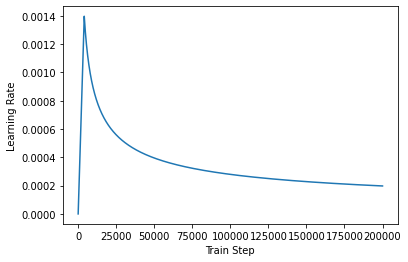

In [61]:
# 커스텀 학습률 스케줄링 계획 시각화 

sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))   # tf.range(200000, dtype=tf.float32)는 학습 단계(step)
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## 4. 모델 컴파일
손실 함수와 커스텀 된 학습률(learning rate)을 사용하여 모델을 컴파일합니다.

In [62]:
# model compile

# CustomSchedule 클래스를 사용하여 학습률(learning rate)을 동적으로 조정합니다. 
# 이 학습률은 Adam 옵티마이저에 적용됩니다. D_MODEL은 모델 내부의 입출력 차원을 나타냅니다.
learning_rate = CustomSchedule(D_MODEL)

# Adam 옵티마이저를 정의하고, 학습률을 지정합니다. beta_1, beta_2, epsilon 등은 Adam 옵티마이저의 하이퍼파라미터입니다.
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


## 5. 훈련하기
이제 학습을 진행해 봅시다.

In [63]:
# model fit

EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
689/689 [==============================] - 81s 106ms/step - loss: 2.1080 - accuracy: 0.0423
Epoch 2/10
689/689 [==============================] - 73s 106ms/step - loss: 1.4994 - accuracy: 0.0791
Epoch 3/10
689/689 [==============================] - 73s 106ms/step - loss: 1.3951 - accuracy: 0.0859
Epoch 4/10
689/689 [==============================] - 73s 106ms/step - loss: 1.3362 - accuracy: 0.0903
Epoch 5/10
689/689 [==============================] - 73s 106ms/step - loss: 1.2860 - accuracy: 0.0942
Epoch 6/10
689/689 [==============================] - 66s 96ms/step - loss: 1.2390 - accuracy: 0.0980
Epoch 7/10
689/689 [==============================] - 37s 54ms/step - loss: 1.1844 - accuracy: 0.1021
Epoch 8/10
689/689 [==============================] - 37s 54ms/step - loss: 1.1223 - accuracy: 0.1074
Epoch 9/10
689/689 [==============================] - 37s 54ms/step - loss: 1.0647 - accuracy: 0.1130
Epoch 10/10
689/689 [==============================] - 37s 54ms/step - loss: 

# 13. 챗봇 테스트하기
예측(inference) 단계는 기본적으로 다음과 같은 과정을 거칩니다.  

1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.
2. 입력 문장을 토크나이징하고, START_TOKEN과 END_TOKEN을 추가한다.
3. 패딩 마스킹과 룩 어헤드 마스킹을 계산한다.
4. 디코더는 입력 시퀀스로부터 다음 단어를 예측한다.
5. 디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.
6. END_TOKEN이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동작을 멈춘다.  

위의 과정을 모두 담은 decoder_inference() 함수를 만듭니다.

In [64]:
# 예측 단계 : decoder_inference() 함수 구현

def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]   # 마지막 시점의 정보만 선택

    # 현재 예측한 단어의 정수
    # 주어진 텐서 predictions에서 마지막 차원(가장 안쪽의 차원 / axis=1 / 어휘 크기)을 따라 최댓값을 가지는 요소의 인덱스를 반환
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료 (END_TOKEN[0]은 종료 토큰의 정수 인덱스)
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    # output_sequence 텐서에서 크기가 1인 차원을 제거 (디코더의 인퍼런스 프로세스 중에 생성된 시퀀스를 반환할 때 사용됨)
  return tf.squeeze(output_sequence, axis=0)

# 기본적으로 디코더의 인퍼런스는 현재까지의 예측된 시퀀스를 계속해서 누적하면서 진행됩니다. 
# 그러나 모델의 출력이 배치 차원을 가지고 있기 때문에, 이를 제거하고 최종 시퀀스를 반환하기 위해 tf.squeeze를 사용합니다. 
# 반환된 시퀀스는 실제 단어의 인덱스를 포함하며, 이는 모델이 생성한 문장입니다.

print("슝=3")

슝=3


**predictions 텐서 주석**  
- [:, -1:, :]: 텐서의 첫 번째 축(배치 축)은 모든 예시(batch)에 대한 정보를 나타냅니다. 
    - [:, -1:, :]는 마지막 시점의 정보만 선택하고자 하는 인덱싱을 나타냅니다.  
    

- 예를 들어, predictions가 (배치 크기, 시퀀스 길이, 어휘 크기)의 모양을 가진 3D 텐서라면, predictions[:, -1:, :]는 모든 예시에 대해 시퀀스의 마지막 단어에 해당하는 부분을 선택합니다.   
결과로 나오는 텐서는 (배치 크기, 1, 어휘 크기) 모양을 가지게 됩니다.

임의의 입력 문장에 대해서 decoder_inference() 함수를 호출하여 챗봇의 대답을 얻는 sentence_generation() 함수를 만듭니다.

In [65]:
# 챗봇의 대답을 얻는 함수 구현 : decoder_inference() 함수를 호출하여

def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

슝=3


### 임의의 문장으로부터 챗봇의 대답을 얻어보기

In [66]:
sentence_generation('Where have you been?')

입력 : Where have you been?
출력 : i m not gonna put it in a few days .


'i m not gonna put it in a few days .'

In [67]:
sentence_generation("It's a trap")

입력 : It's a trap
출력 : i m sorry , but i can t understand it . i can t even help you .


'i m sorry , but i can t understand it . i can t even help you .'

---

## 회고
- 전체 단계가 매우 많고, 적용되는 개념들도 이해하기 어렵다.
    - 전체 흐름과 개념들을 이해하기 쉬운 다른 자료들을 찾아봐야겠다.
- 사용되는 함수가 너무 많아서 그 함수가 어떤 기능이었는지, 어디에서 사용되는지 정리가 안된다.
    - 각 단계 별 함수와 기능을 정리해봐야겠다.